#Import

In [1]:
# packages

import pandas as pd
import numpy as nup 
import seaborn as sns
import re
import numpy as np
import math

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [2]:
# Connect to drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Move the directory to the csv files
%cd /content/drive/MyDrive/NLP/csv

/content/drive/.shortcut-targets-by-id/10jQIuTiIEwNUYyC2tiVRcsH1-ND-ng9R/NLP/csv


In [4]:
ls

aclImdb/                           rbonik.csv
aclImdb_v1.tar.gz                  resume_classification_model/
cleaned_resume                     resume_dataset.csv
cleaned_resume.csv                 Resume_dataset_final.csv
cleaned_resume_dataset.csv         sample_da_job2.docx
cleaned_resume_dataset.gsheet      sample_da_job.docx
cleaned_resume_final.csv           test/
Data_analyst_sample_job_desc.gdoc  UpdatedResumeDataSet.csv
glove.6B.100d.txt


In [5]:
# Load required CSV files

df=pd.read_csv("cleaned_resume.csv")

In [6]:
df['Category_no'] = df.groupby('Category').ngroup()

In [7]:
df

,Unnamed: 0,Category,Resume,cleaned_resume,Category_no
0,0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...,5
1,1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may data scientist data s...,5
2,2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,5
3,3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,5
4,4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,5
...,...,...,...,...,...
957,957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skill proficient m office word basic ...,21
958,958,Testing,â Willingness to accept the challenges. â ...,willingness accept challenge positive thinking...,21
959,959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skill quick learner eagerness learn n...,21
960,960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skill software knowledge point m offi...,21


In [20]:
df.Category.unique().tolist()

['Data Science',
 'HR',
 'Advocate/Sales',
 'Other',
 'Web Designing',
 'Mechanical Mechanical Engineer',
 'Advocate/Sales/Sales',
 'Mechanical Engineer',
 'Java Developer',
 'Business Analyst',
 'SAP Developer',
 'Automation Testing',
 'Electrical Mechanical Engineering',
 'Operations Manager',
 'Python Developer',
 'DevOps Mechanical Engineer',
 'NetAdvocate/Sales Security Mechanical Engineer',
 'PMO',
 'Database',
 'Hadoop',
 'ETL Developer',
 'Blockchain',
 'Testing']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.cleaned_resume,
    df.Category_no,
    test_size = 0.2,
    random_state=2,
    stratify=df.Category_no
)

In [10]:
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)

Shape of X_train :  (769,)
Shape of X_test :  (193,)


In [11]:
import pickle

In [12]:

# KNN classifier
clf_knn = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('KNN', KNeighborsClassifier())
])

clf_knn.fit(X_train, y_train)
pickle.dump(clf_knn, open('/content/drive/MyDrive/NLP/pkl/tfidf_knn.pkl', 'wb'))
y_pred_knn = clf_knn.predict(X_test)

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       0.80      1.00      0.89         8
           6       1.00      0.86      0.92         7
           7       1.00      0.91      0.95        11
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         6
          10       1.00      0.78      0.88         9
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         5
          16       0.80      1.00      0.89         8
          17       1.00    

<Axes: >

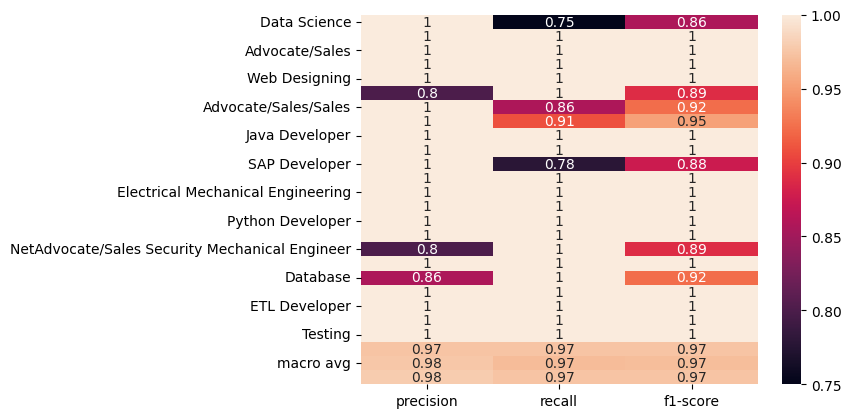

In [22]:
knn_report_dict = classification_report(y_test, y_pred_knn,target_names=df.Category.unique().tolist(),output_dict=True)
sns.heatmap(pd.DataFrame(knn_report_dict).iloc[:-1, :].T, annot=True)

In [ ]:
# Testing the model
test = []
test.append(df['Resume'][36])

y_pred_test = clf_knn.predict(test)
print('Category of predicted resume is : ', df.loc[df['Category_no'] == y_pred_test[0]]['Category'].unique()[0])
print(df['Category'][36])

Category of predicted resume is :  Data Science
Data Science


In [ ]:
# Gaussian naive bayes classifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.preprocessing import DenseTransformer

clf_gnb = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('to_dense', DenseTransformer()),
    ('GNB', GaussianNB())
])

clf_gnb.fit(X_train, y_train)
pickle.dump(clf_gnb, open('/content/drive/MyDrive/NLP/pkl/tfidf_gnb.pkl', 'wb'))

y_pred_gnb = clf_gnb.predict(X_test)

print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         7
           7       1.00      0.91      0.95        11
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         8
          17       1.00    

In [ ]:
# Testing the model
test = []
test.append(df['Resume'][36])

y_pred_test = clf_gnb.predict(test)
print('Category of predicted resume is : ', df.loc[df['Category_no'] == y_pred_test[0]]['Category'].unique()[0])
print(df['Category'][36])

Category of predicted resume is :  Data Science
Data Science


In [ ]:
# Random forrest classifier
from sklearn.ensemble import RandomForestClassifier
clf_rf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('Random Forest', RandomForestClassifier())
])

clf_rf.fit(X_train, y_train)
pickle.dump(clf_rf, open('/content/drive/MyDrive/NLP/pkl/tfidf_rf.pkl', 'wb'))

y_pred_rf = clf_rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         7
           7       1.00      0.91      0.95        11
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         8
          17       1.00    

In [13]:
# Plot

def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

In [ ]:
# Testing the model
test = []
test.append(df['Resume'][36])

y_pred_test = clf_rf.predict(test)
print('Category of predicted resume is : ', df.loc[df['Category_no'] == y_pred_test[0]]['Category'].unique()[0])
print(df['Category'][36])

Category of predicted resume is :  Data Science
Data Science


In [ ]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 8.1 MB/s eta 0:00:00


In [ ]:
# Testing from a new resume
from PyPDF2 import PdfReader

def extract_information(pdf_path):
    reader = PdfReader(pdf_path)
    number_of_pages = len(reader.pages)
    page = reader.pages[0]
    pdf_text = page.extract_text()
    
    return pdf_text

In [ ]:
cd test

/content/drive/MyDrive/NLP/csv/test


In [ ]:
ls

data-scientist-resume-example.pdf  tfidf_knn.pkl
java-developer-resume-example.pdf


In [ ]:
pdf_import = extract_information('java-developer-resume-example.pdf')

In [ ]:
test_pdf = []
test_pdf.append(pdf_import)

cleaned_pdf = preprocess_text(test_pdf)

NameError: ignored

In [ ]:
# Testing the model

y_pred_test = clf_rf.predict(cleaned_pdf)
print(y_pred_test)
print('Category of predicted resume is : ', df.loc[df['Category_no'] == y_pred_test[0]]['Category'].unique()[0])